# Deep Learning: Simple CVLib

A simple, high level, easy-to-use open source Computer Vision library for Python. By: [Ibrahim Sobh](https://eg.linkedin.com/in/ibrahim-sobh-phd-8681757) AND his [github](https://github.com/arunponnusamy/cvlib) shares ideas about *cvlib* production.

Before we get started, let us create a function that allows us to take a picture within *ipynb* environment.

In [ ]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image

VIDEO_HTML = """
<video autoplay
 width=%d height=%d style='cursor: pointer;'></video>
<script>

var video = document.querySelector('video')

navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)
  
var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""
def take_photo(filename='photo.jpg', quality=0.8, size=(800,600)):
  display(HTML(VIDEO_HTML % (size[0],size[1],quality)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  f = io.BytesIO(binary)
  return np.asarray(Image.open(f))
#   with open(filename, 'wb') as f:
#     f.write(binary)
#   return len(binary)

## Face detection

Face detection is a computer technology being used in a variety of applications that identifies human faces in digital images. Face detection also refers to the psychological process by which humans locate and attend to faces in a visual scene.

In [ ]:
#!pip install cvlib

In [3]:
import cvlib as cv

Using TensorFlow backend.


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [101]:
# A: take a live picture
image = take_photo()

In [103]:
# B: use an online picture
!wget -nv https://i1.wp.com/yinscapital.com/wp-content/uploads/2019/09/Lo-2-e1568141482617.jpg -O img02.jpg

2019-12-28 10:46:35 URL:https://i1.wp.com/yinscapital.com/wp-content/uploads/2019/09/Lo-2-e1568141482617.jpg [125972/125972] -> "img02.jpg" [1]


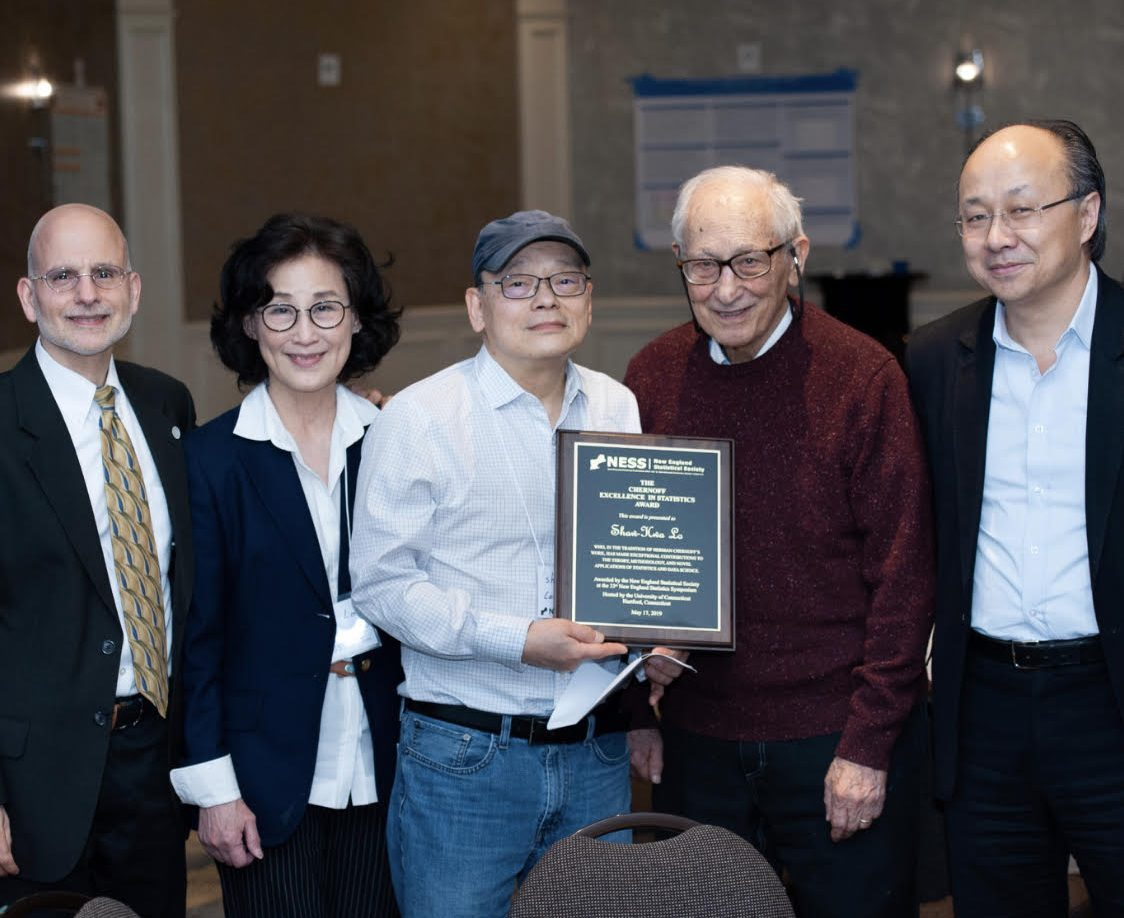

In [104]:
image = cv2.imread('./img02.jpg')
cv2_imshow(image)

In [105]:
faces, confidences = cv.detect_face(image)
print(faces, confidences)

[[33, 215, 132, 352], [684, 206, 784, 339], [253, 255, 352, 382], [957, 147, 1075, 298], [486, 239, 593, 358]] [0.99375546, 0.99310935, 0.9894894, 0.98148316, 0.9724409]


In [ ]:
# loop through detected faces
for face,conf in zip(faces,confidences):

    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]

    # draw rectangle over face
    cv2.rectangle(image, (startX,startY), (endX,endY), (0,255,0), 2)

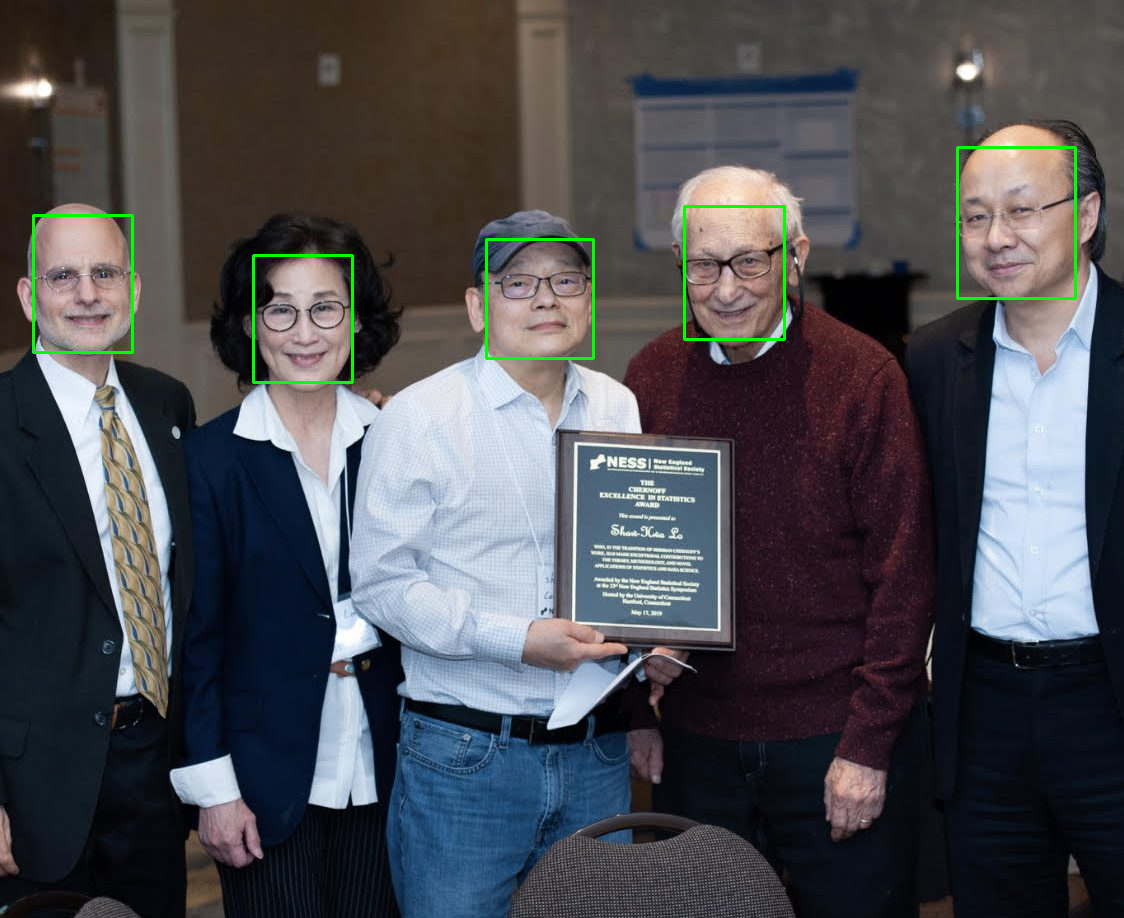

In [107]:
cv2_imshow(image)

## Gender Detection

Based on the technology of Face Detection, Gender Detection not only seeks out the location of faces but also whether the person is male or female.

In [77]:
# A: take a live picture
image = take_photo() # click

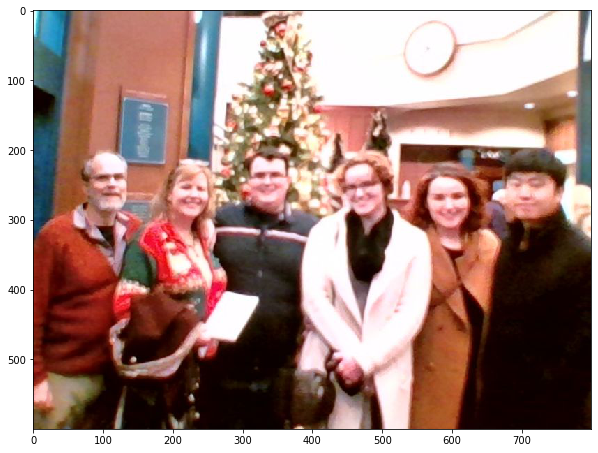

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

2019-12-28 10:47:10 URL:https://i1.wp.com/yinscapital.com/wp-content/uploads/2019/09/Lo-2-e1568141482617.jpg [125972/125972] -> "img03.jpg" [1]


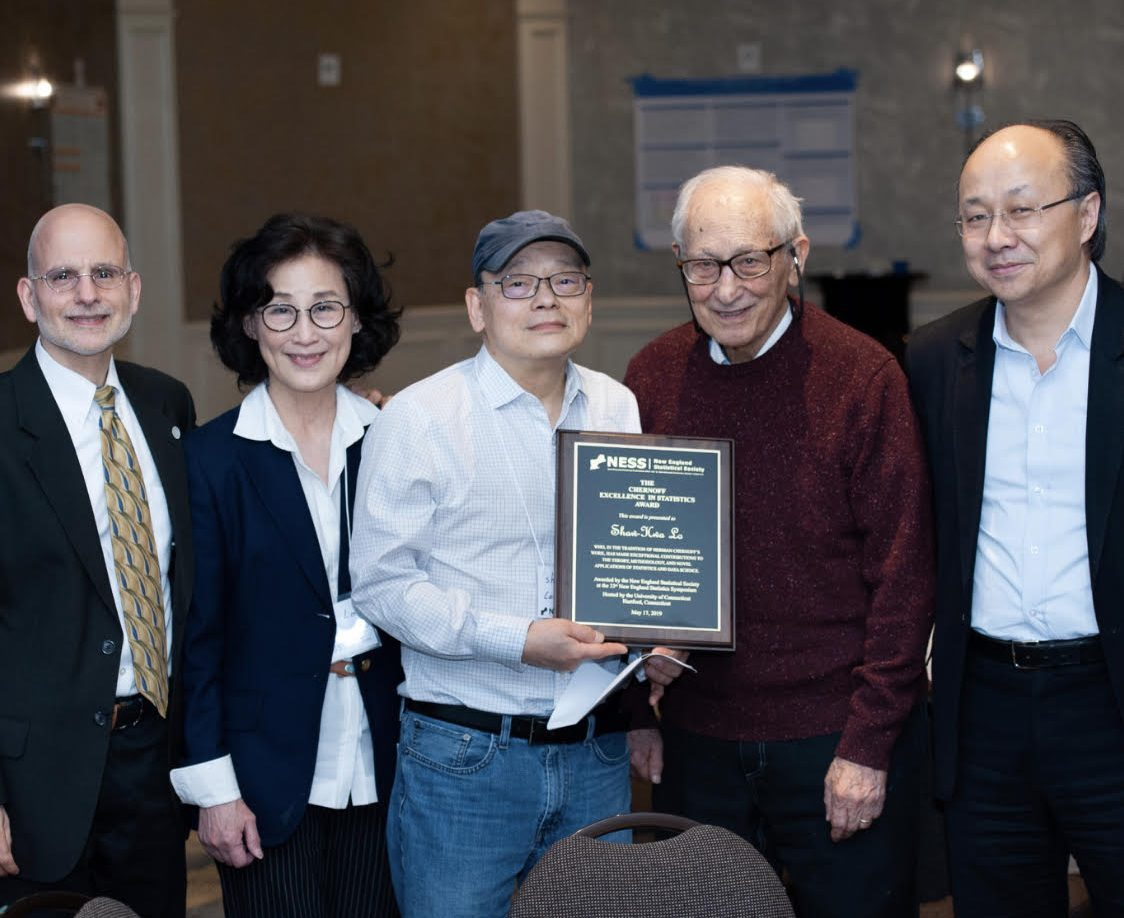

In [108]:
# B: use an online picture
!wget -nv https://i1.wp.com/yinscapital.com/wp-content/uploads/2019/09/Lo-2-e1568141482617.jpg -O img03.jpg
image = cv2.imread('./img03.jpg')
cv2_imshow(image)

In [109]:
faces, confidences = cv.detect_face(image)
print(faces, confidences)

[[33, 215, 132, 352], [684, 206, 784, 339], [253, 255, 352, 382], [957, 147, 1075, 298], [486, 239, 593, 358]] [0.99375546, 0.99310935, 0.9894894, 0.98148316, 0.9724409]


In [ ]:
padding = 10 

# loop through detected faces
for f in faces:

    (startX,startY) = max(0, f[0]-padding), max(0, f[1]-padding)
    (endX,endY) = min(image.shape[1]-1, f[2]+padding), min(image.shape[0]-1, f[3]+padding)
    
    # draw rectangle over face
    cv2.rectangle(image, (startX,startY), (endX,endY), (255,128,0), 2)

    face_crop = np.copy(image[startY:endY, startX:endX])

    # apply gender detection
    (label, confidence) = cv.detect_gender(face_crop)

    idx = np.argmax(confidence)
    label = label[idx]

    label = "{}: {:.1f}%".format(label, confidence[idx] * 100)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    cv2.putText(image, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

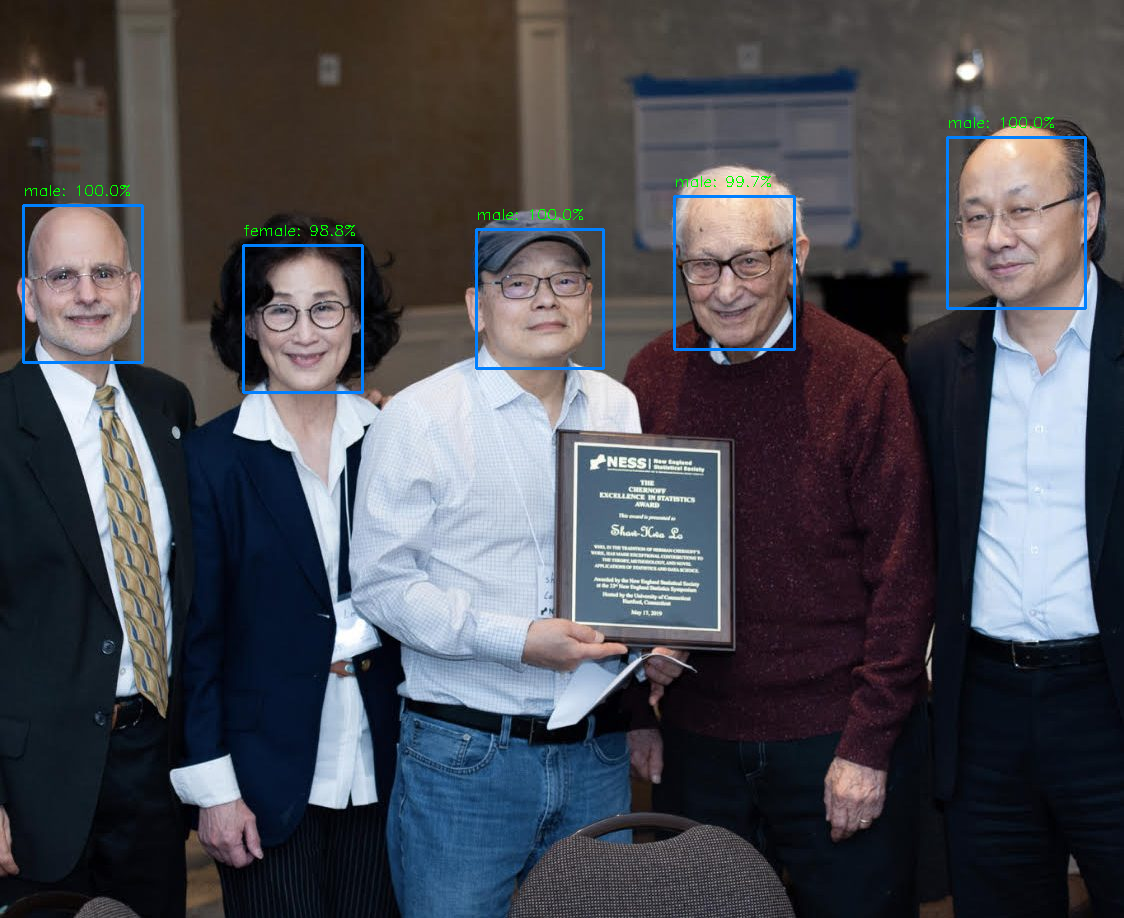

In [111]:
cv2_imshow(image)

## Object Detection

Object detection is a computer technology related to computer vision and image processing that deals with detecting instances of semantic objects of a certain class (such as humans, buildings, or cars) in digital images and videos.

In [96]:
# A: take a live a picture
image = take_photo() # click

2019-12-28 10:48:13 URL:https://cdn.pixabay.com/photo/2013/07/05/01/08/traffic-143391_960_720.jpg [192644/192644] -> "traffic.jpg" [1]


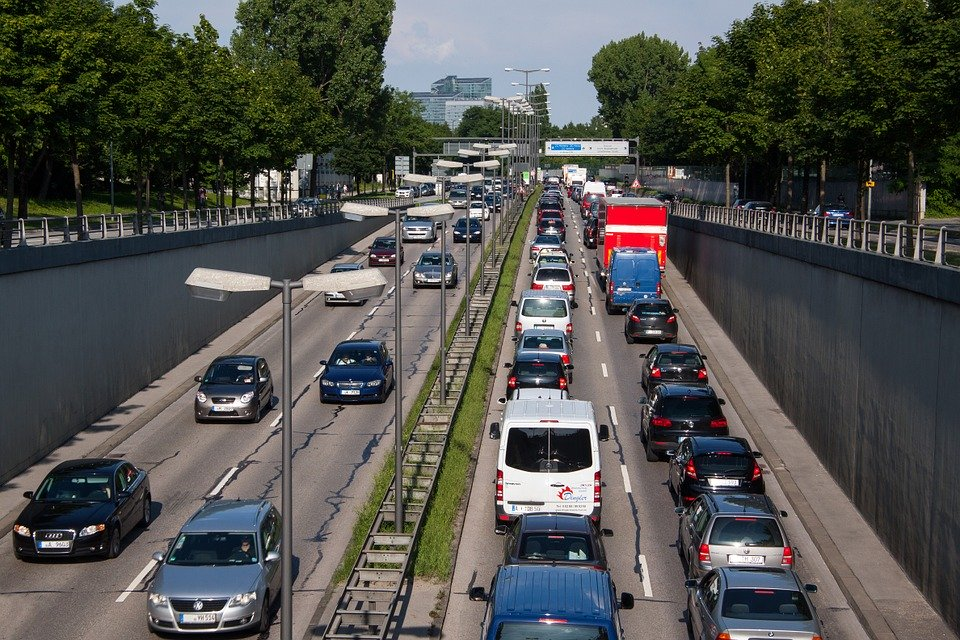

In [112]:
# B: use an online picture
!wget -nv https://cdn.pixabay.com/photo/2013/07/05/01/08/traffic-143391_960_720.jpg -O traffic.jpg
image = cv2.imread('./traffic.jpg')
cv2_imshow(image)

In [113]:
# def detect_common_objects(image, confidence=0.5, nms_thresh=0.3, model='yolov3' or 'yolov3-tiny')
bbox, label, conf = cv.detect_common_objects(image, confidence=0.3)
print(bbox, label, conf)

[[8, 458, 158, 562], [196, 354, 276, 422], [316, 343, 394, 401], [642, 345, 706, 387], [142, 502, 288, 634], [686, 564, 828, 640], [409, 256, 455, 288], [623, 301, 677, 343], [472, 562, 644, 642], [399, 218, 435, 242], [509, 353, 569, 395], [454, 217, 482, 241], [695, 512, 789, 578], [675, 434, 753, 490], [528, 259, 574, 297], [365, 239, 399, 267], [643, 395, 723, 453], [512, 290, 574, 340], [306, 264, 380, 306], [602, 200, 668, 310], [322, 255, 368, 271], [534, 230, 562, 248], [506, 511, 596, 561], [538, 218, 562, 236], [486, 405, 604, 535], [536, 206, 562, 226], [540, 193, 562, 209], [531, 240, 563, 260], [456, 194, 482, 210], [820, 208, 852, 220], [518, 326, 568, 354], [484, 195, 500, 209], [737, 199, 769, 211], [230, 536, 256, 558], [445, 184, 469, 200], [530, 252, 568, 272], [691, 490, 773, 528], [400, 180, 434, 198]] ['car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'truck', 'car', 'car', 'car', '

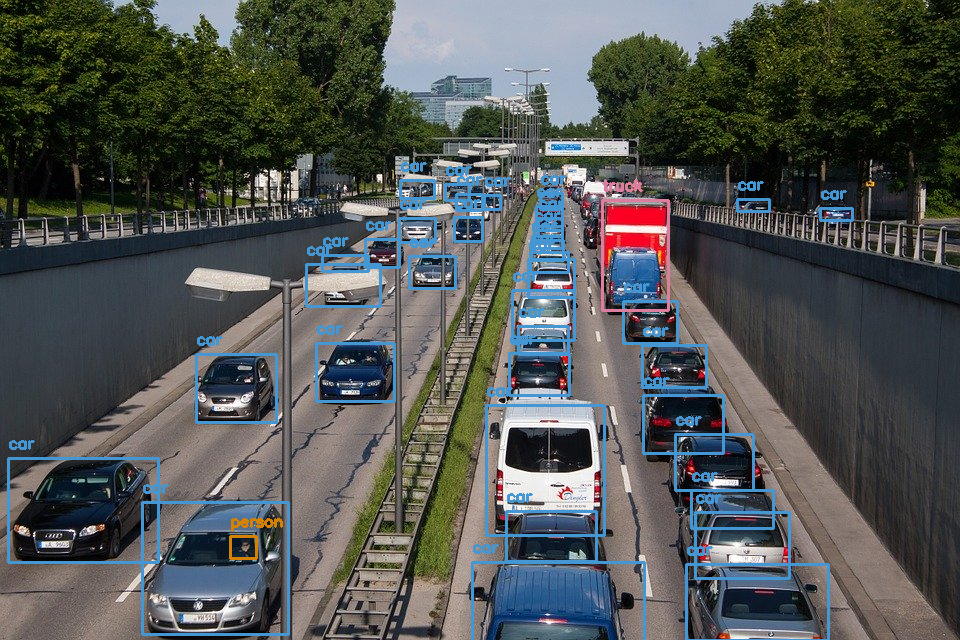

In [114]:
# def draw_bbox(img, bbox, labels, confidence, colors=None, write_conf=False):
out = cv.object_detection.draw_bbox(image, bbox, label, conf)
cv2_imshow(out)

This wraps of this notebook for object detection.